<a href="https://colab.research.google.com/github/Zamoca42/TIL/blob/main/AI/HW_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HW#2

- 본인만의 데이터 생성 후 저장 
  - csv 파일 저장 복습
- 본인만의 데이터 설명 
  - 주석 등을 이용하여 파일에 표시
- 데이터 구분하는 네트워크 생성 후 학습 
  - 학습되는 결과 등 요약하여 첨부

- 결과 도식 
  - matplot 활용하여 accuracy, loss 등 표시하고, sigmoid 함수가 어떻게 변화하는 지 설명

In [ ]:
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

X = np.random.rand(1)*20
Y = np.zeros(1)
X = np.append(X,np.random.rand(1)*20+100)
Y = np.append(Y,np.ones(1))

for i in range(99):
  X = np.append(X,np.random.rand(1)*20)
  Y = np.append(Y,np.zeros(1))
  # 입력 X에서 0~20사이의 값을 랜덤으로 생성하고 출력Y값은 0으로 생성
  X = np.append(X,np.random.rand(1)*20+100)
  Y = np.append(Y,np.ones(1))
  # 입력 X는 100~120 사이의 값을 랜덤으로 생성하고 출력Y값은 1로 생성
# X데이터는 0~20 사이값 100개 100~120 사이값 100개 총 200개


Xdata = pd.DataFrame(X)
Ydata = pd.DataFrame(Y)

Xdata.to_csv("/content/drive/MyDrive/Colab Notebooks/inputX.csv",mode='w')
Ydata.to_csv("/content/drive/MyDrive/Colab Notebooks/outputY.csv",mode='w')

[<tf.Variable 'dense/kernel:0' shape=(1, 1) dtype=float32, numpy=array([[0.06383976]], dtype=float32)>, <tf.Variable 'dense/bias:0' shape=(1,) dtype=float32, numpy=array([-2.5279992], dtype=float32)>]
1/1 [==============================] - 0s 98ms/step
[[0.13128993]]
1/1 [==============================] - 0s 39ms/step
[[0.98895174]]


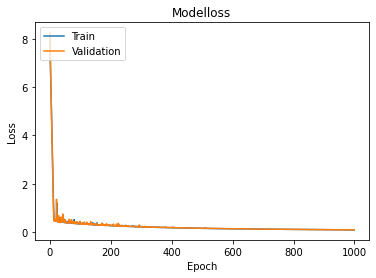

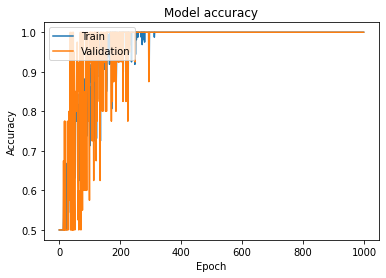

In [ ]:
model = keras.models.Sequential([
    keras.layers.Dense(units=1, activation='sigmoid', input_shape=[1]),
])

opt = keras.optimizers.SGD(learning_rate=0.01)

model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
# ,metrics=['accuracy'] -> 정확도

hist = model.fit(Xdata,Ydata, batch_size=100, epochs=1000, validation_split=0.2, shuffle = True, verbose = 0)
# shuffle = True -> 데이터를 섞겠다. 
# validation_split=0.2 -> Train data 200개중에 20% = 40개의 data를 validation으로 사용하겠다.(랜덤 X)

print(model.weights)
print(model.predict([10]))
print(model.predict([110]))
# 10과 110을 Test데이터로 사용하여 확인

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Modelloss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()



# 결과

Test데이터를 대입한 결과 10에서는 0.1312로 0에 가까운 값이 나오고 110에서는 0.988로 1에 가까운 값이 나온다.

loss 그래프 상에서 Train과 Validation이 거의 일치하고 정확도도 비슷하다는 점에서 학습이 잘 되었다는 것을 알 수 있다.

여기서 나온 w의 값은 약 0.063 편향값 b는 약 -2.528 이므로 $$ y = 0.063x - 2.528$$ 을 sigmoid 함수에 대입하면

![스크린샷 2022-10-25 오후 9 41 56](https://user-images.githubusercontent.com/96982072/197775934-94bcc287-ae29-48cb-a488-d5b7168a9f33.png)

이런 sigmoid 그래프가 나오는 것을 알 수 있다.